In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
y = np.random.rand(10) *10
x = np.arange(0,10,1)
z = np.array([[1,1],[2,2]])
x_y = np.column_stack((x,y)).astype(np.uint8)

#mean, std

mean = np.mean(x, axis= 0)
std = np.std(x, axis=0)

print(x_y.shape)

(10, 2)


In [ ]:
#hacer todas las combinaciones

xx, yy = np.meshgrid(x,y)
all_combinations = np.column_stack((xx.ravel(), yy.ravel()))

print(all_combinations.shape)

(100, 2)


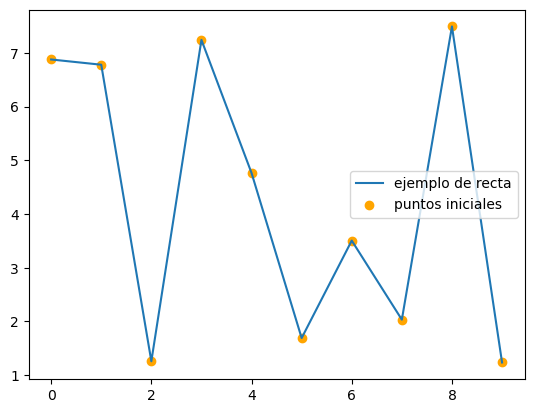

In [29]:
#Mostrar un grafico

plt.figure()
plt.plot(x,y,label='ejemplo de recta')
plt.scatter(x,y, color='orange', label='puntos iniciales')
plt.legend()
plt.show()


In [ ]:
#cargar los datos
data = np.loadtxt('datos_agua.txt',delimiter=';')
X = data[:,:-1] #(54,1)
X = np.column_stack((np.ones((X.shape[0],1)), X))
y = data[:,-1].reshape(-1,1)

(54, 1)


In [56]:
#Tratamiento de Matrices
#multiplicacion es con @
np.linalg.pinv(X) #Asi se hace la invertida
X.T #->asi la invertida
np.sum(X)
theta = np.zeros((2,1))

In [ ]:
#Creacion de puntos
B0 = np.linspace(0,1,10)
print(B0)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [ ]:
#Regresion lineal con sklearn
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x, y) #x sin la columna de unos
y_predict = modelo.predict#(x_test) #


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False)
X_poly = poly.fit_transform(x) #Con esta aprendes y le enseñas al objeto poly el numero de caracteristicas y todo
xx = poly.transform(X_poly) #Esto son los datos que vas a probar nuevos, como el test



In [ ]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler() #crearme el objeto para normalizar
X_norm = norm.fit_transform(X) #con la columna x, la normlizo

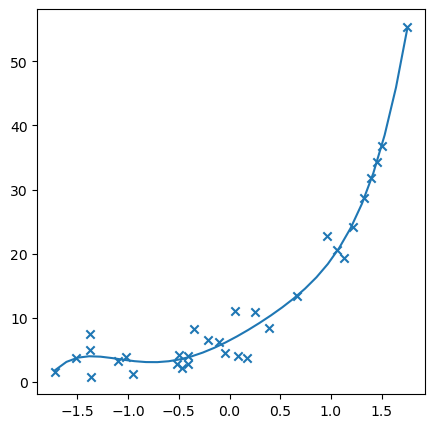

In [4]:
#Regresion lineal
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


data = np.loadtxt('datos_agua.txt',delimiter=';')
#si voy a usar sklearn no agrego los unos, pero para practicar lo hare
X = data[:,:-1]
y = data[:,-1]
#dividimos 80train, 20 test
X_train_full, X_test, y_train_full,y_test = train_test_split(X,y, test_size=0.20, random_state=5)
#volvemos a dividir para validacion, de tal forma que queda 60 train, 20 val, 20 test
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=X_test.shape[0],random_state=5)

#Normalizacion
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

#X_val_norm = scaler.transform(X_val)
#X_test_norm = scaler.transform(X_test)

#Despues de ver el grafico es un problema que se puede solucionar con regresion lineal polinomial

poly = PolynomialFeatures(5, include_bias=False)
X_train_poly_norm = poly.fit_transform(X_train_norm)

modelo = LinearRegression()
modelo.fit(X_train_poly_norm,y_train)

#vamos a ver como se ve en el grafico
xx_norm = np.linspace(np.min(X_train_norm),np.max(X_train_norm), X_train_norm.shape[0])
xx_poly = poly.transform(xx_norm.reshape(-1,1))

yy_norm = modelo.predict(xx_poly)

#mostramos la grafica
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_train_norm,y_train, marker='x')
ax.plot(xx_norm,yy_norm, label='Regresion lineal sin polinomios')
plt.show()